In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('pollution_avg_final.csv')

# Set pandas options to display all rows and columns
print("=========Dtype of all columns=========")
print(df.dtypes)

print("=========Involving Nan=========")
print(df.isna().sum())

print("========= Statistical Description =========") 
print(df.describe())

=========Dtype of all columns=========
Unnamed: 0      int64
District       object
City           object
year            int64
pm25           object
pm10           object
so2            object
o3             object
no2            object
co             object
AVG           float64
dtype: object
=========Involving Nan=========
Unnamed: 0       0
District         0
City             0
year             0
pm25          6898
pm10          1412
so2           1396
o3            1395
no2           1398
co            1395
AVG              0
dtype: int64
========= Statistical Description =========
         Unnamed: 0          year           AVG
count  13872.000000  13872.000000  13872.000000
mean    6935.500000   2015.056228     82.157301
std     4004.645802      3.167769      1.596384
min        0.000000   2010.000000     77.620000
25%     3467.750000   2012.000000     81.090000
50%     6935.500000   2015.000000     82.135000
75%    10403.250000   2018.000000     83.170000
max    13871.000000   2

In [ ]:
pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

# convert num* to num and num** to num
df['pm25'] = df['pm25'].str.replace("*", "").str.replace("\*\*", "")
df['pm10'] = df['pm10'].str.replace("*", "").str.replace("\*\*", "")
df['o3'] = df['o3'].str.replace("*", "").str.replace("\*\*", "")
df['no2'] = df['no2'].str.replace("*", "").str.replace("\*\*", "")
df['so2'] = df['so2'].str.replace("*", "").str.replace("\*\*", "")
df['co'] = df['co'].str.replace("*", "").str.replace("\*\*", "")

# -  이거나 빈 경우 0으로 채우기
for column in pollutants:
    df[column] = df[column].replace('-', np.nan)
    df[column] = df[column].replace('', np.nan)
    df[column].fillna(0, inplace=True)

# float로 type 변경
for column in pollutants:
    df[column] = pd.to_numeric(df[column], errors='coerce')

############# 2010~2014 pm25 값처리 부분이 문제 : 0으로 그냥 놔뒀을 때가 제일 높음.. #############

# 1.  pm25의 2010~2014 부분에 pm25 전체 평균 집어넣기 
#mean_pm25 = df['pm25'].mean()
#df.loc[(df['year'] >= 2010) & (df['year'] <= 2014) & (df['pm25'] == 0), 'pm25'] = mean_pm25

# 2.  2015부터 2020년까지의 pm25 값만 고려하여 평균 계산 
#mean_pm25 = df.loc[(df['year'] >= 2015) & (df['year'] <= 2020), 'pm25'].mean()
#df.loc[(df['year'] >= 2010) & (df['year'] <= 2014) & (df['pm25'] == 0), 'pm25'] = mean_pm25

#################################################################################################

# 0인 경우 해당하는 District, 해당하는 year의 평균으로 채우기
for column in pollutants:
    for district in df['District'].unique():
        for year in df['year'].unique():
            mean_value = df[(df['District'] == district) & (df['year'] == year)][column].mean()
            df.loc[(df['District'] == district) & (df['year'] == year) & (df[column] == 0), column] = mean_value

print(df)
df.to_csv('final.csv')

C:\Users\somi4\AppData\Local\Temp\ipykernel_12856\3034213315.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['pm25'] = df['pm25'].str.replace("*", "").str.replace("\*\*", "")
C:\Users\somi4\AppData\Local\Temp\ipykernel_12856\3034213315.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['pm25'] = df['pm25'].str.replace("*", "").str.replace("\*\*", "")
C:\Users\somi4\AppData\Local\Temp\ipykernel_12856\3034213315.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['pm10'] = df['pm10'].str.replace("*", "").str.replace("\*\*", "")
C:\Users\somi4\AppData\Local\Temp\ipykernel_12856\3034213315.py:5: FutureWarning: The de

       Unnamed: 0 District City  year       pm25  pm10    so2     o3    no2  \
0               0      강원도   강릉  2010   0.000000  48.0  0.007  0.024  0.020   
1               1      강원도   강릉  2010   0.000000  51.0  0.006  0.022  0.022   
2               2      강원도   강릉  2010   0.000000  62.0  0.006  0.028  0.020   
3               3      강원도   강릉  2010   0.000000  51.0  0.006  0.036  0.020   
4               4      강원도   강릉  2010   0.000000  51.0  0.004  0.044  0.017   
...           ...      ...  ...   ...        ...   ...    ...    ...    ...   
13867       13867     충청북도   충주  2020  13.000000  21.0  0.002  0.021  0.009   
13868       13868     충청북도   충주  2020  11.000000  20.0  0.003  0.028  0.011   
13869       13869     충청북도   충주  2020  23.000000  42.0  0.003  0.019  0.019   
13870       13870     충청북도   충주  2020  28.000000  44.0  0.003  0.016  0.023   
13871       13871     충청북도   충주  2020  19.361111  35.0  0.003  0.023  0.015   

        co    AVG  
0      0.6  79.83  
1      0.6 

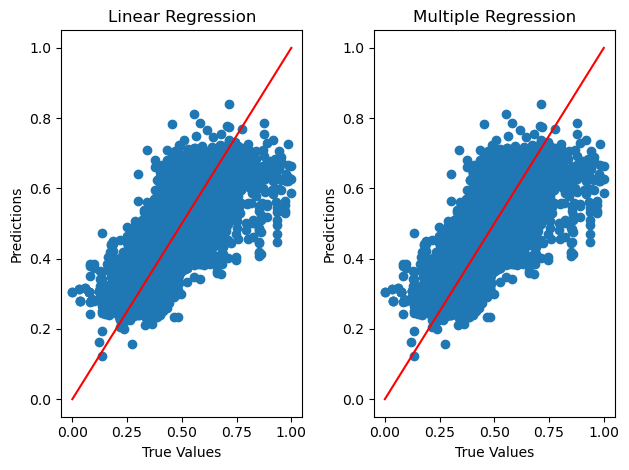

Linear Regression Accuracy: 50.30% (0.71%)
Multiple Regression Accuracy: 50.30% (0.71%)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('final.csv')

# 행 하나가 혼자 안 바뀌어있음.. 이유 모르겠다
df = df.dropna()

# 원-핫 인코딩
encoded_df = pd.get_dummies(df, columns=['District'], dtype=int)

# 데이터 준비
X = encoded_df[['pm25', 'pm10','so2','o3', 'no2', 'co']]
y = encoded_df['AVG']
Districts = ['District_강원도', 'District_경기도',  'District_경상남도', 'District_경상북도', 'District_광주광역시',  'District_대구광역시',  'District_대전광역시',  'District_부산광역시',  'District_서울특별시', 'District_세종특별자치시',  'District_울산광역시',  'District_인천광역시',  'District_전라남도', 'District_전라북도',  'District_제주특별자치도',  'District_충청남도',  'District_충청북도'   ]

# Standard Scaling for X
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

# Concatenate Districts with X_scaled
X_scaled_with_districts = encoded_df[Districts].copy()
X_scaled_with_districts[X.columns] = X_scaled

# MinMax Scaling for y
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1))

# Train/Test set 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled_with_districts, y_scaled, test_size=0.3, random_state=0)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Multiple Linear Regression
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)
y_pred_multiple = multiple_model.predict(X_test)

# Scatter plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression")
plt.plot([0, 1], [0, 1], color='red')

# Scatter plot for Multiple Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_multiple)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Multiple Regression")
plt.plot([0, 1], [0, 1], color='red')

plt.tight_layout()
plt.show()

# K-Fold Cross Validation
kfold = KFold(n_splits=5, random_state=0, shuffle=True)

# Apply k-Fold Cross Validation
results_linear = cross_val_score(linear_model, X_train, y_train, cv=kfold)
results_multiple = cross_val_score(multiple_model, X_train, y_train, cv=kfold)

# Print cross validation score
print("Linear Regression Accuracy: %.2f%% (%.2f%%)" % (results_linear.mean()*100, results_linear.std()*100))
print("Multiple Regression Accuracy: %.2f%% (%.2f%%)" % (results_multiple.mean()*100, results_multiple.std()*100))

In [ ]:
# 최적의 하이퍼파라미터 K 값 찾기!! - 5가 젤 좋음
# List to store scores
scores_linear = []
scores_multiple = []

# K values to try
k_values = range(2, 21)

# For each K value...
for k in k_values:
    # Create a KFold object
    kfold = KFold(n_splits=k, random_state=0, shuffle=True)
    
    # Apply k-Fold Cross Validation
    result_linear = cross_val_score(linear_model, X_train, y_train, cv=kfold)
    result_multiple = cross_val_score(multiple_model, X_train, y_train, cv=kfold)
    
    # Record average accuracy
    scores_linear.append(result_linear.mean())
    scores_multiple.append(result_multiple.mean())

# Print the best K and its score for Linear Regression
best_k_linear = k_values[scores_linear.index(max(scores_linear))]
print(f"Best K for Linear Regression: {best_k_linear}, Accuracy: {max(scores_linear)*100:.2f}%")

# Print the best K and its score for Multiple Regression
best_k_multiple = k_values[scores_multiple.index(max(scores_multiple))]
print(f"Best K for Multiple Regression: {best_k_multiple}, Accuracy: {max(scores_multiple)*100:.2f}%")

Best K for Linear Regression: 5, Accuracy: 50.30%
Best K for Multiple Regression: 5, Accuracy: 50.30%
